In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("btc-usd-max.csv")
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['snapped_at'] = df['snapped_at'].dt.strftime('%Y-%m-%d')
df.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


In [3]:
df.tail()

,snapped_at,price,market_cap,total_volume
4071,2024-06-22,64071.624285,1.263259e+12,2.469431e+10
4072,2024-06-23,64239.903488,1.266336e+12,6.340607e+09
4073,2024-06-24,63221.357384,1.248189e+12,1.074827e+10
4074,2024-06-25,60363.234975,1.188965e+12,4.203655e+10
4075,2024-06-26,61770.413870,1.217935e+12,2.110556e+10


In [5]:
df.describe()

,price,market_cap,total_volume
count,4076.000000,4.075000e+03,4.076000e+03
mean,14789.071017,2.788116e+11,1.487804e+10
std,18333.414102,3.537351e+11,1.836061e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,594.937025,8.094853e+09,2.464434e+08
50%,7202.445947,1.266835e+11,5.273313e+09
75%,23948.771166,4.588550e+11,2.482783e+10
max,73097.767027,1.436631e+12,1.788941e+11


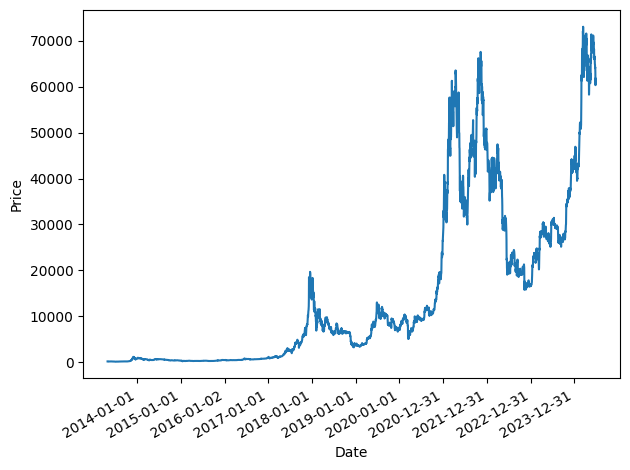

In [8]:
fig, ax = plt.subplots()

ax.plot(df["snapped_at"], df["price"])
ax.set_xlabel("Date")
ax.set_ylabel("Price")
# ax.axvspan(2056, 2421, color='#808080', alpha=0.2)

plt.xticks(np.arange(247, 4075,365))

fig.autofmt_xdate()
plt.tight_layout()

Is this Random Walk?


In [9]:
ADF_result = adfuller(df['price'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.9626467274280434
p-value: 0.766643173539757


p-value is not less than 0.05 so cannot reject null hypothesis.


so we get difference

In [10]:
diff_price = np.diff(df['price'], n=1)

In [11]:
diff_ADF_result = adfuller(diff_price)

print(f'ADF Statistic: {diff_ADF_result[0]}')
print(f'p-value: {diff_ADF_result[1]}')

ADF Statistic: -9.78713885050368
p-value: 6.4981276863329e-17


p-value is less than 0.05 so diff_price is stationary.

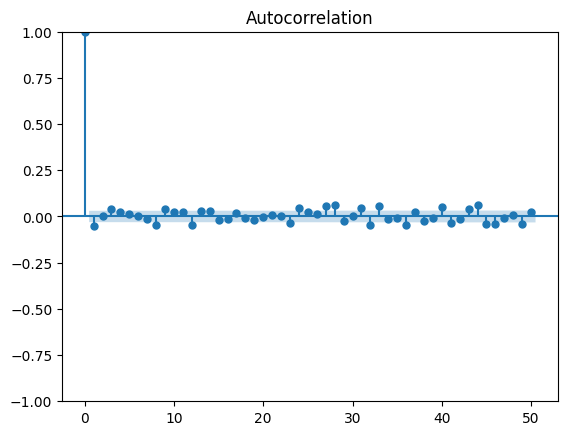

In [13]:
plot_acf(diff_price, lags=50);

Time series is very near to Random Walk. But not 100%